In [5]:
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors
import mapclassify
from matplotlib.patches import Patch
from pathlib import Path

In [66]:
# Set base project path
base_path = Path("C:/Users/juami/Dropbox/RAships/2-Folklore-Nathan-Project/EA-Maps-Nathan-project/Measures_work")

# Set file paths
precol_path = base_path / "maps" / "interim" / "world_thiessen_FINAL" / "EAESW" / "EAESW_XY_World_Thiessen.shp"
poscol_path = base_path / "data" / "raw" / "ethnologue" / "ancestral_characteristics_database_language_level" / "Ethnologue_16_shapefile" / "langa_no_overlap_biggest_clean.shp"

precol_csv_path = base_path / "data" / "interim" / "Motifs_EA_WESEE_humanvsnature_all.csv"
poscol_csv_path = base_path / "data" / "interim" / "Motifs_EA_WESEE_Ethnologue_humanvsnature_all.csv"

export_path = base_path / "deliveries" / "maps_presentation_12052025"


In [ ]:
# Read the shapefiles and CSV files
precol_shape = gpd.read_file(precol_path)
poscol_shape = gpd.read_file(poscol_path)

precol_df = pd.read_csv(precol_csv_path)
poscol_df = pd.read_csv(poscol_csv_path)

# Merge the shapefiles with the CSV data
precol_shape_merged = precol_shape.merge(precol_df, left_on='v107', right_on='v107', how='left')
poscol_shape_merged = poscol_shape.merge(poscol_df, left_on='ID', right_on='id', how='left')

In [68]:
def truncate_colormap(cmap_name='BuPu', minval=0.3, maxval=1.0, n=100):
    cmap = plt.get_cmap(cmap_name)
    new_cmap = mcolors.LinearSegmentedColormap.from_list(
        f'{cmap_name}_trunc', cmap(np.linspace(minval, maxval, n)))
    return new_cmap

# Create a stronger BuPu (skip the lightest 30%)
strong_bupu = truncate_colormap('BuPu', 0.3, 1.0)

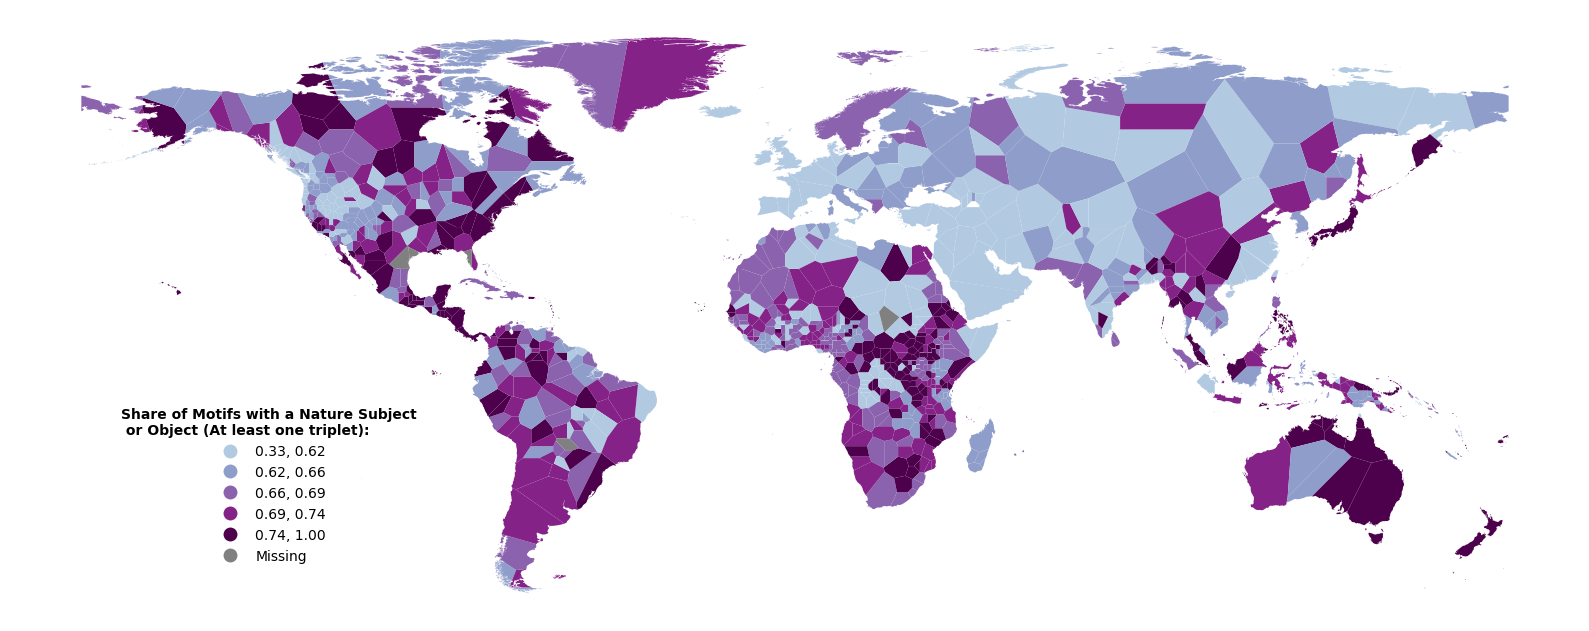

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8), facecolor='white')

gdf = precol_shape_merged.copy()

gdf.plot(
    ax=ax,
    column='sh_nature_any_motif_atl',
    scheme='quantiles',
    k=5,
    cmap=strong_bupu,
    edgecolor='black',
    linewidth=0,
    legend=True,
    legend_kwds={'frameon': False},
    missing_kwds={
        "color": "gray",
        "label": "Missing"
    }
)

# Remove axis
ax.set_axis_off()

# Move legend using bbox_to_anchor (x, y, width, height)
leg = ax.get_legend()
if leg:
    leg.set_bbox_to_anchor((0.07, 0.17, 0.2, 0.2))  # Fine-tune as needed
    leg.set_title("Share of Motifs with a Nature Subject \n or Object (At least one triplet):",
                  prop={'weight': 'bold'})
    leg.set_frame_on(False)  # No border

plt.tight_layout()

# Save to PDF
plt.savefig(export_path / "PRECOL_sh_nature_any_motif_atl.pdf", format='pdf', bbox_inches='tight')

# Optional: also show the figure
plt.show()


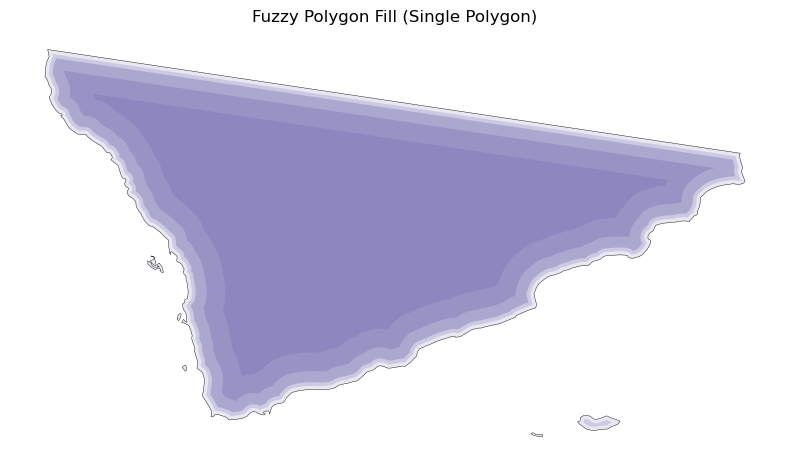

In [87]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import to_rgba

gdf = precol_shape_merged.copy()
poly = gdf.geometry.iloc[4]
val = gdf['sh_nature_any_motif_atl'].iloc[4]

# Set up color scale
norm = mpl.colors.Normalize(vmin=gdf['sh_nature_any_motif_atl'].min(), vmax=gdf['sh_nature_any_motif_atl'].max())
cmap = mpl.cm.get_cmap(strong_bupu)
base_color = to_rgba(cmap(norm(val)))

# Create a buffer around the polygon
shrink = -1.5  # Adjust this value to control the size of the buffer
buffer1 = poly.buffer(shrink)
buffer2 = poly.buffer(-1)
buffer3 = poly.buffer(-.5)
buffer4 = poly.buffer(-.2)
buffer5 = poly.buffer(-.1)

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

gpd.GeoSeries([buffer1]).plot(ax=ax, color=base_color, edgecolor='none')
gpd.GeoSeries([buffer2]).plot(ax=ax, color=base_color, edgecolor='none', alpha=0.9)
gpd.GeoSeries([buffer3]).plot(ax=ax, color=base_color, edgecolor='none', alpha=0.6)
gpd.GeoSeries([buffer4]).plot(ax=ax, color=base_color, edgecolor='none', alpha=0.5)
gpd.GeoSeries([buffer5]).plot(ax=ax, color=base_color, edgecolor='none', alpha=0.3)
gpd.GeoSeries([poly]).plot(ax=ax, color=base_color, edgecolor='none', alpha=0.2)
gpd.GeoSeries([poly]).boundary.plot(ax=ax, color='black', linewidth=0.3)

# Final touches
ax.set_title("Fuzzy Polygon Fill (Single Polygon)")
ax.set_axis_off()
plt.tight_layout()
plt.show()

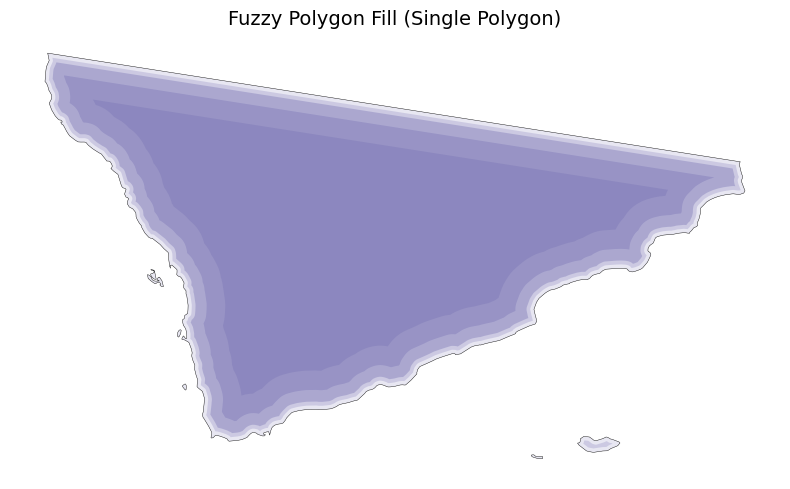

In [92]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import to_rgba

# Copy GeoDataFrame and keep original CRS
gdf = precol_shape_merged.copy()
poly = gdf.geometry.iloc[4]
val = gdf['sh_nature_any_motif_atl'].iloc[4]

# Set up color scale
norm = mpl.colors.Normalize(vmin=gdf['sh_nature_any_motif_atl'].min(), vmax=gdf['sh_nature_any_motif_atl'].max())
cmap = mpl.cm.get_cmap(strong_bupu)
base_color = to_rgba(cmap(norm(val)))

# Define buffer distances and corresponding alphas (same order as your code)
buffer_steps = [-1.5, -1, -0.5, -0.2, -0.1]
alphas = [1.0, 0.9, 0.6, 0.5, 0.3]

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 8), facecolor='white')

# Loop through buffer levels and plot
for shrink, alpha in zip(buffer_steps, alphas):
    buffered = poly.buffer(shrink)
    if not buffered.is_empty:
        gpd.GeoSeries([buffered], crs=gdf.crs).plot(
            ax=ax, color=base_color, edgecolor='none', alpha=alpha
        )

# Plot the original polygon with a soft fill
gpd.GeoSeries([poly], crs=gdf.crs).plot(ax=ax, color=base_color, edgecolor='none', alpha=0.2)

# Plot the outline
gpd.GeoSeries([poly], crs=gdf.crs).boundary.plot(ax=ax, color='black', linewidth=0.3)

# Final touches
ax.set_title("Fuzzy Polygon Fill (Single Polygon)", fontsize=14)
ax.set_axis_off()
plt.tight_layout()
plt.show()


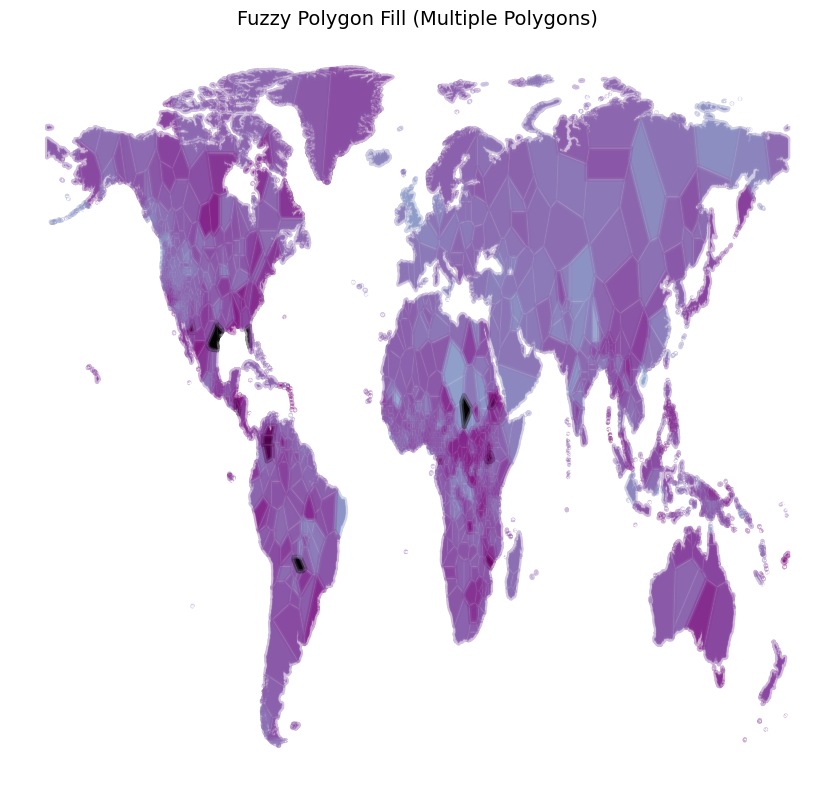

In [112]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import to_rgba

# Copy GeoDataFrame and keep original CRS
gdf = precol_shape_merged.copy()

# Select multiple polygons (e.g., first 5)
subset = gdf

# Set up color scale
norm = mpl.colors.Normalize(vmin=gdf['sh_nature_any_motif_atl'].min(), 
                            vmax=gdf['sh_nature_any_motif_atl'].max())
cmap = mpl.cm.get_cmap(strong_bupu)

# Define buffer distances and corresponding alphas
buffer_steps = [-1.5, -1, -0.5, -0.2, -0.1]
alphas = [1.0, 0.9, 0.8, 0.7, 0.55]

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 8), facecolor='white')

# Loop through polygons
for _, row in subset.iterrows():
    poly = row.geometry
    val = row['sh_nature_any_motif_atl']
    base_color = to_rgba(cmap(norm(val)))

    # Loop through buffer layers
    for shrink, alpha in zip(buffer_steps, alphas):
        buffered = poly.buffer(shrink)
        if not buffered.is_empty:
            gpd.GeoSeries([buffered], crs=gdf.crs).plot(
                ax=ax, color=base_color, edgecolor='none', alpha=alpha
            )

    # Plot the original polygon with a soft fill and outline
    gpd.GeoSeries([poly], crs=gdf.crs).plot(ax=ax, color=base_color, edgecolor='none', alpha=0.5)
    gpd.GeoSeries([poly], crs=gdf.crs).boundary.plot(ax=ax, color=base_color, linewidth=3, alpha=0.4)

# Final touches
ax.set_title("Fuzzy Polygon Fill (Multiple Polygons)", fontsize=14)
ax.set_axis_off()
plt.tight_layout()
plt.savefig(export_path / "PRECOL_sh_nature_any_motif_atl.pdf", format='pdf', bbox_inches='tight')
plt.show()

